# Analysing Global Protests since 1990

## Introduction
This project will explore a set of three datasets related to protest and democracy. This project aggregates information from three distinct datasets, offering a rich, multidimensional perspective on mass mobilization, socio-political conditions, and human development. It is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Description of the data points
******
### Mass Mobilization Dataset

Focus: Tracks protest events globally, capturing information about the type of protests, their scale, and their outcomes.

Features include:
Dates and locations of protests.
Types of demands made by protesters (e.g., economic, political, social).
Government responses to protests.

### V-Dem Dataset (Varieties of Democracy)

Focus: Measures the quality and characteristics of democracy across countries.
Features include:
Indicators of democratic governance (e.g., electoral integrity, civil liberties).
Political participation and freedom of expression.
Trends in authoritarian practices.

### Human Development Index (HDI) Dataset

Focus: Captures socio-economic development metrics across nations, with the key metric here being the HDI score.


To begin, we'll start by importing our relevant libraries, and reading in our data from csv.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

print(massmob_df.head())
print (massmob_df.columns)

# Since I'm focusing on complete data, I want to remove all rows where the value in the protest column is 0.
massmob_df = massmob_df[massmob_df['protest'] != 0]



          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

Let's start by looking at global protest frequency on a yearly basis.

    year  num_protests
0   1990           572
1   1991           372
2   1992           409
3   1993           329
4   1994           390
5   1995           355
6   1996           409
7   1997           488
8   1998           442
9   1999           411
10  2000           488
11  2001           393
12  2002           415
13  2003           387
14  2004           442
15  2005           497
16  2006           454
17  2007           445
18  2008           398
19  2009           376
20  2010           452
21  2011           688
22  2012           553
23  2013           586
24  2014           769
25  2015           857
26  2016           713
27  2017           541
28  2018           698
29  2019           814
30  2020            96
491.5806451612903
857
96


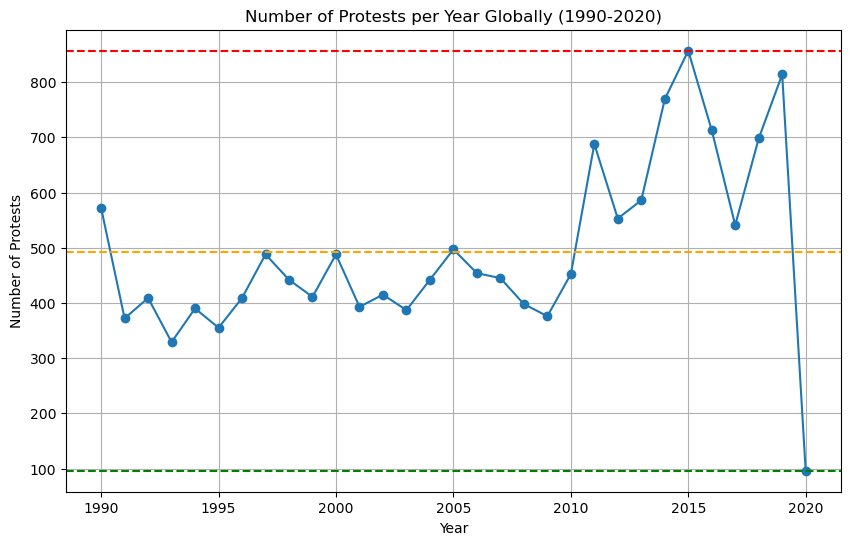

In [2]:
# Group by 'Year'
yeargrouped = massmob_df.groupby('year')

# Count the number of protests for each year
protests_per_year = yeargrouped.size().reset_index(name='num_protests')

print(protests_per_year)

# Calculate average, min, and max
average = protests_per_year['num_protests'].mean()
minimum = protests_per_year['num_protests'].min()
maximum = protests_per_year['num_protests'].max()
print (average)
print(maximum)
print(minimum)

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2020)')
plt.xlabel('Year')

plt.ylabel('Number of Protests')
# Add average, min, and max lines
plt.axhline(y=average, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=minimum, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=maximum, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()



As you can see from the plot above, the number of yearly protests in the 90s and 00s stayed relatively constant, before a large spike in the 2010s, aligning with the Global banking crisis, the Arab Spring movement and the increase of climate-related protests in the West. Aside from 2020, where data only includes the first 2 months, 1993 was the year of least mobilisation, with 329 protests recorded. 2015, on the other hand, could be considered the largest year of mass mobilisation in recent decades, with 857 protests recorded worldwide. The average number of yearly protests from 1990 to 2020 was 492; however, as previously mentioned, this is swayed heavily by the 2010s, with yearly numbers only hitting this total 4 times before 2011.

            region  num_protests
0           Africa          3184
1             Asia          3126
2  Central America           451
3           Europe          4994
4             MENA          1260
5    North America           527
6          Oceania            38
7    South America          1659


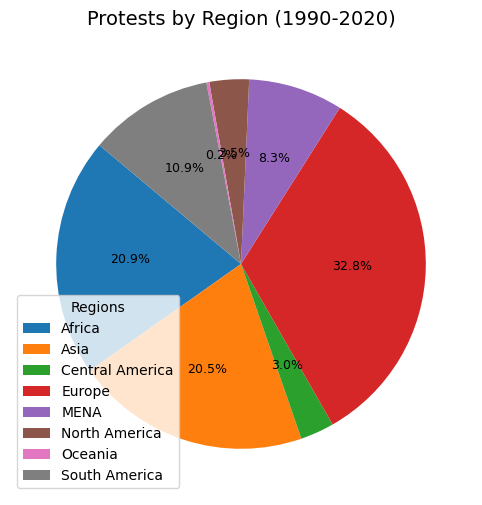

In [70]:
# Group by region and count the number of protests
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)

# Plot pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Protests by Region (1990-2020)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)  # Adjust legend font size
plt.show()




As we can see above, Europe has the highest proportion of the protests recorded in this period, followed respectively by Africa and Asia, with a sizeable proportion also in South America and MENA (Middle East & North Africa).

Let's now look at another indicator; the primary reason for protest.

              protesterdemand1  num_protests
0           labor wage dispute          1710
1              land farm issue           467
2             police brutality           825
3  political behavior, process          9680
4  price increases, tax policy          1087
5        removal of politician          1011
6          social restrictions           458


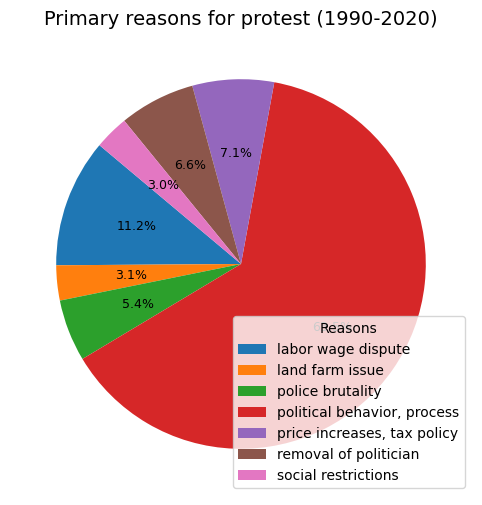

In [3]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

# Plot pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest (1990-2020)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()


Interestingly, political behavior and process has dominated the reasoning behind protests taking places in the previous 3 decades. Of the other reasons, only Labour/wage disputes reaches 10%.

Let's now refine our analysis to look at Ireland.

In [4]:
ireland_df = massmob_df[massmob_df['country'] == 'Ireland']
print(ireland_df.head())


              id  country  ccode  year  region  protest  protestnumber  \
3383  2051992001  Ireland    205  1992  Europe        1              1   
3384  2051992002  Ireland    205  1992  Europe        1              2   
3385  2051992003  Ireland    205  1992  Europe        1              3   
3386  2051992004  Ireland    205  1992  Europe        1              4   
3387  2051992005  Ireland    205  1992  Europe        1              5   

      startday  startmonth  startyear  ...  protesterdemand4  stateresponse1  \
3383       6.0         6.0     1992.0  ...               NaN          ignore   
3384       6.0         6.0     1992.0  ...               NaN          ignore   
3385       1.0         7.0     1992.0  ...               NaN          ignore   
3386      16.0         7.0     1992.0  ...               NaN          ignore   
3387      21.0         7.0     1992.0  ...               NaN          ignore   

      stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
3383

    year  num_protests
0   1992            17
1   1993             9
2   1994            33
3   1996             1
4   1997            28
5   1999             1
6   2000             1
7   2002             1
8   2003            40
9   2004            27
10  2005            29
11  2006            38
12  2007            41
13  2008             1
14  2009             3
15  2010             4
16  2012             2
17  2013            27
18  2014            56
19  2015            32
20  2016            19
21  2017             6
22  2018             9
23  2019             6
17.958333333333332
56
1


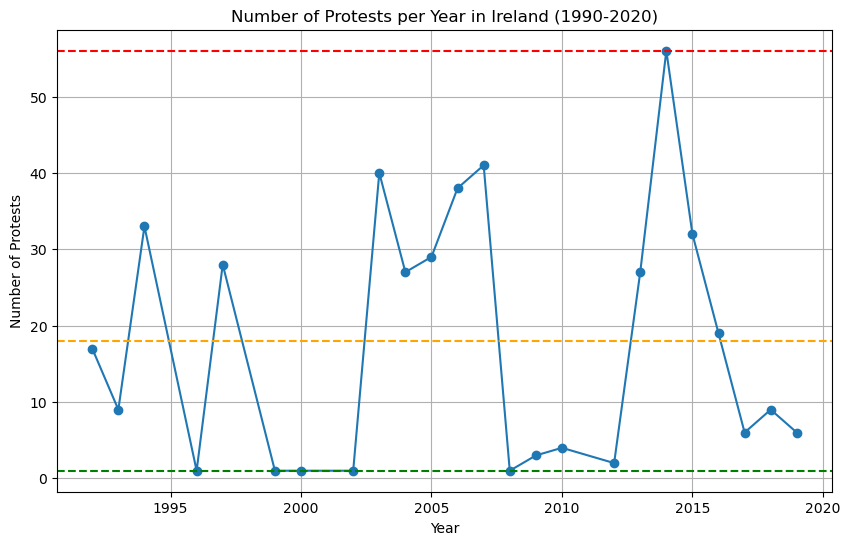

In [5]:
# Group by 'Year'
yeargrouped_ie = ireland_df.groupby('year')

# Count the number of protests for each year
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

print(protests_per_year_ie)

# Calculate average, min, and max
average = protests_per_year_ie['num_protests'].mean()
minimum = protests_per_year_ie['num_protests'].min()
maximum = protests_per_year_ie['num_protests'].max()
print (average)
print(maximum)
print(minimum)

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2020)')
plt.xlabel('Year')

plt.ylabel('Number of Protests')
# Add average, min, and max lines
plt.axhline(y=average, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=minimum, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=maximum, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()

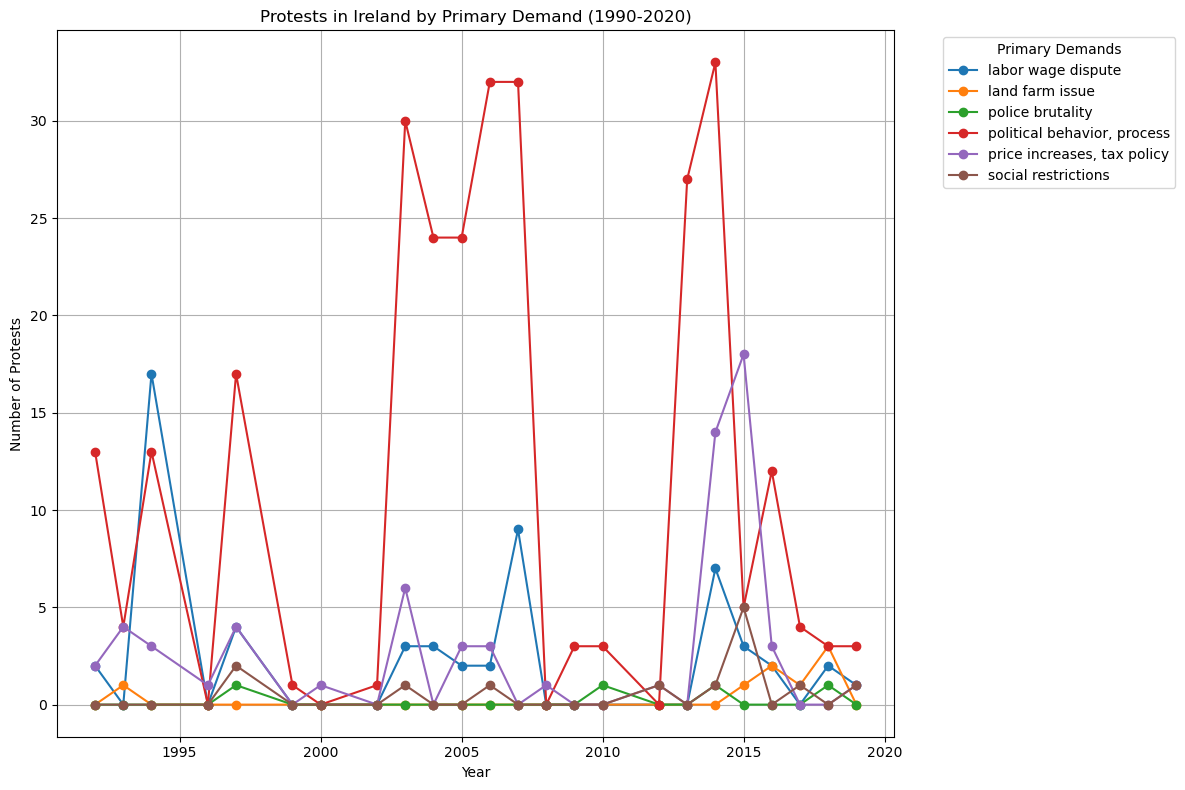

In [6]:
# Group by Year and Primary Demand, and count the number of protests
protests_by_reason_ie = ireland_df.groupby(['year', 'protesterdemand1']).size().reset_index(name='num_protests')

# Pivot the table to have years as rows and demands as columns
pivot_data = protests_by_reason_ie.pivot(index='year', columns='protesterdemand1', values='num_protests').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
for reason in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[reason], label=reason, marker='o')

plt.title('Protests in Ireland by Primary Demand (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend(title='Primary Demands', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()
plt.tight_layout()
plt.show()

Next:
- Add Linear Regression
- Add in V-dem csv and have a look at a couple of metrics across the world:
 - Liberaldemocracy index vs numprotests

In [5]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip')

print(vdem_df.head())



/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_31672/892073649.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip')


  country_name country_text_id  country_id  year historical_date  project  \
0       Mexico             MEX           3  1789      1789-12-31        1   
1       Mexico             MEX           3  1790      1790-12-31        1   
2       Mexico             MEX           3  1791      1791-12-31        1   
3       Mexico             MEX           3  1792      1792-12-31        1   
4       Mexico             MEX           3  1793      1793-12-31        1   

   historical                  histname  codingstart  codingend  ...  \
0           1  Viceroyalty of New Spain         1789       2023  ...   
1           1  Viceroyalty of New Spain         1789       2023  ...   
2           1  Viceroyalty of New Spain         1789       2023  ...   
3           1  Viceroyalty of New Spain         1789       2023  ...   
4           1  Viceroyalty of New Spain         1789       2023  ...   

   e_mipopula  e_miurbani  e_pefeliex  e_wb_pop  e_pechmor  e_miinteco  \
0         NaN         NaN     